# Support Vector Machines and Kernels

![SVM.png](Assets/SVM.png)

# Learning Objectives

- Apply support vector machines (SVMs)—a popular algorithm used for classification problems
- Recognize SVM similarity to logistic regression
- Compute the cost function of SVMs
- Apply regularization in SVMs and some tips to obtain non-linear classifications with SVMs
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code PRIOR to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [2]:
pip install scikit-learn-intelex

In [2]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [3]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')


In [5]:
data.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

In [4]:
y = (data['Class'] == 'red').astype(int)
fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
print(correlations)

Area                NaN
Perimeter           NaN
Major_Axis_Length   NaN
Minor_Axis_Length   NaN
Convex_Area         NaN
Equiv_Diameter      NaN
Eccentricity        NaN
Solidity            NaN
Extent              NaN
Roundness           NaN
Aspect_Ration       NaN
Compactness         NaN
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

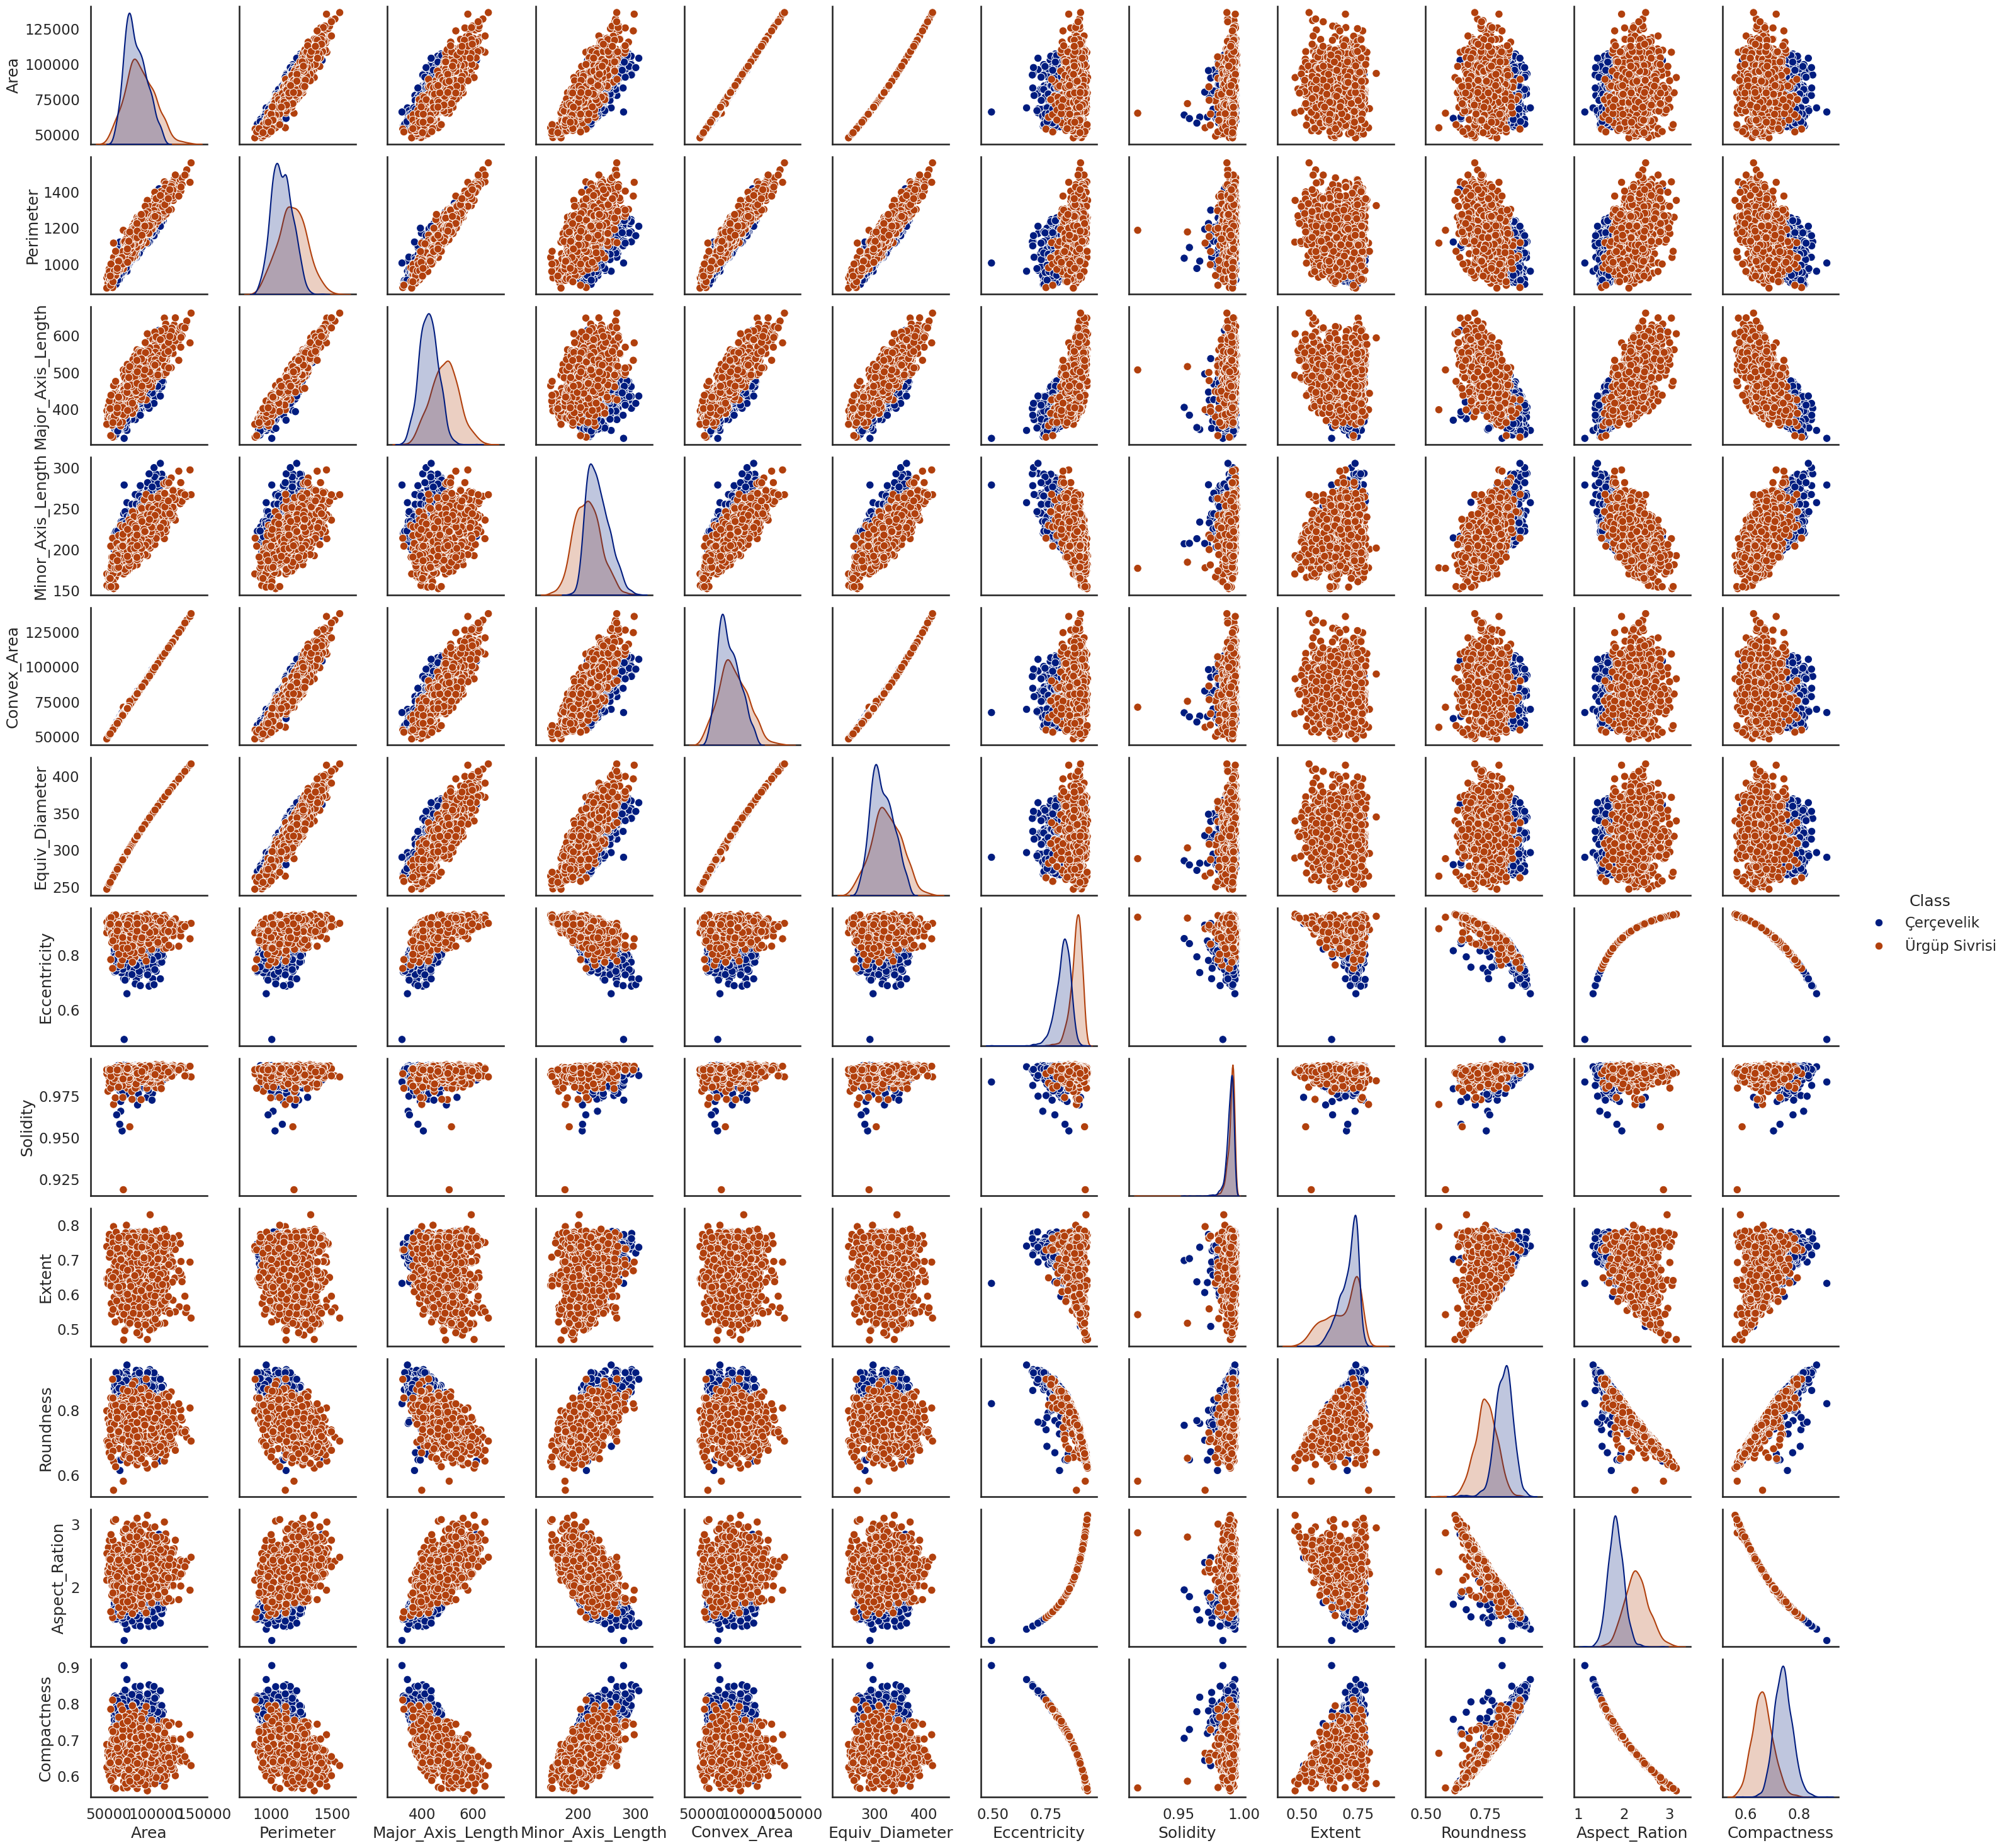

In [14]:
sns.pairplot(data, hue='Class')

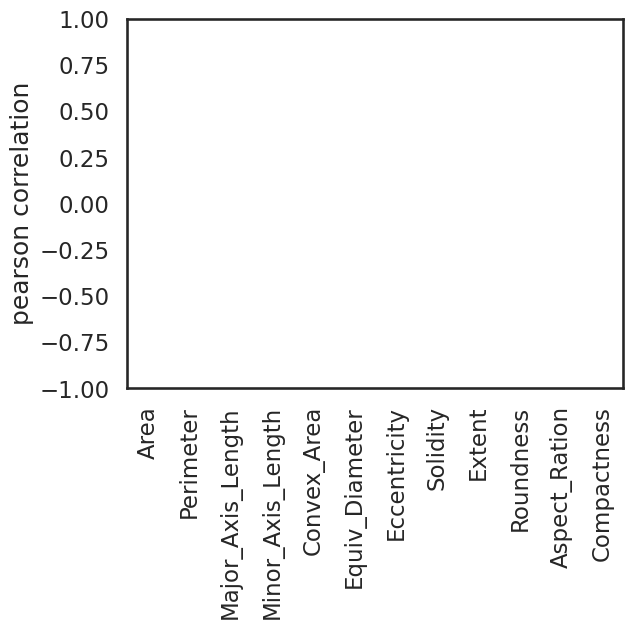

In [9]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [6]:
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['Aspect_Ration', 'Compactness'], dtype='object')
Index(['Aspect_Ration_scaled', 'Compactness_scaled'], dtype='object')


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation.

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

In [7]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')
print(data['Class'].unique())

# Filter for 2 classes only (adjust these classes as per your dataset)
data_binary = data[data['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()

# Encode class labels as 0 and 1
label_encoder = LabelEncoder()
data_binary['Class'] = label_encoder.fit_transform(data_binary['Class'])

X_bin = data_binary.drop('Class', axis=1)
y_bin = data_binary['Class']

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_bin_pca = pca.fit_transform(X_bin)



['Çerçevelik' 'Ürgüp Sivrisi']


In [8]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Fit LinearSVC model
svc = LinearSVC(max_iter=10000)
svc.fit(X_bin_pca, y_bin)





LinearSVC(max_iter=10000)

In [9]:
# Visualize the decision boundary
# Create a grid for plotting decision boundaries
x_min, x_max = X_bin_pca[:, 0].min() - 1, X_bin_pca[:, 0].max() + 1



In [10]:
y_min, y_max = X_bin_pca[:, 1].min() - 1, X_bin_pca[:, 1].max() + 1


In [11]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 2.0), np.arange(y_min, y_max, 2.0))

In [12]:

# Predict the class labels for the grid points
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

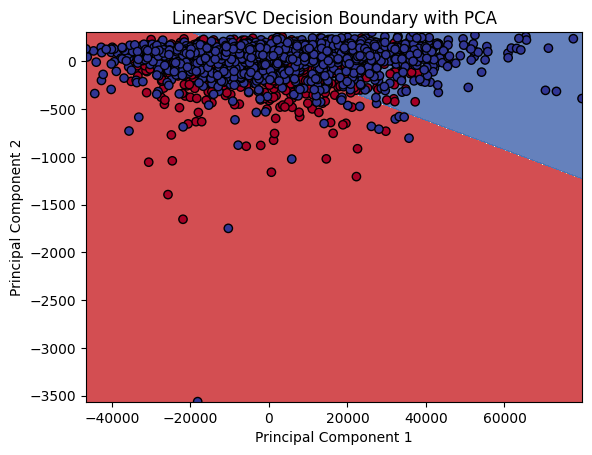

In [7]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
plt.scatter(X_bin_pca[:, 0], X_bin_pca[:, 1], c=y_bin, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('LinearSVC Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import resample

def plot_decision_boundary(estimator, X, y, title='Decision Boundary'):
    # Reduce to 2D using PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Fit model on PCA-transformed data
    estimator.fit(X_pca, y)

    # Sample 300 data points for scatter plot
    X_sample, y_sample = resample(X_pca, y, n_samples=300, random_state=42)

    # Color mapping
    y_colors = ['red' if label == 1 else 'yellow' for label in y_sample]

    # Create grid to evaluate model
    x_axis, y_axis = np.arange(-3, 3, .01), np.arange(-3, 3, .01)
    xx, yy = np.meshgrid(x_axis, y_axis)
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on grid
    y_pred_grid = estimator.predict(X_grid)
    y_pred_grid = y_pred_grid.reshape(xx.shape)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contourf(xx, yy, y_pred_grid, cmap=plt.cm.autumn_r, alpha=0.3)
    ax.scatter(X_sample[:, 0], X_sample[:, 1], c=y_colors, edgecolor='k')
    ax.set_title(title)
    plt.show()


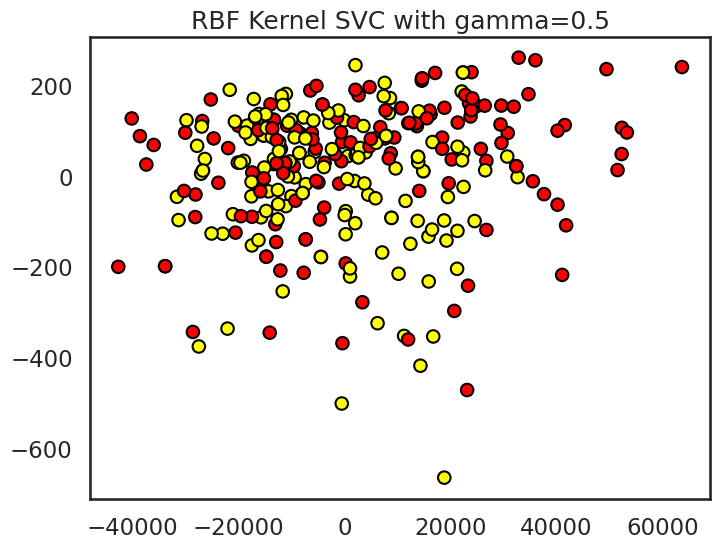

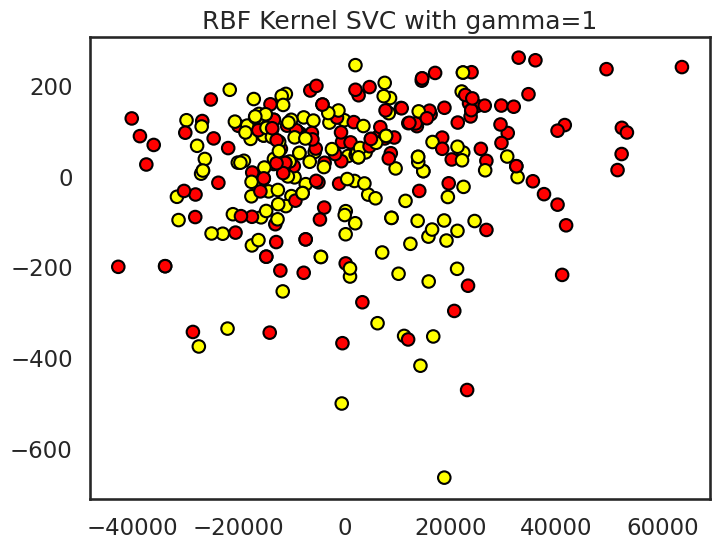

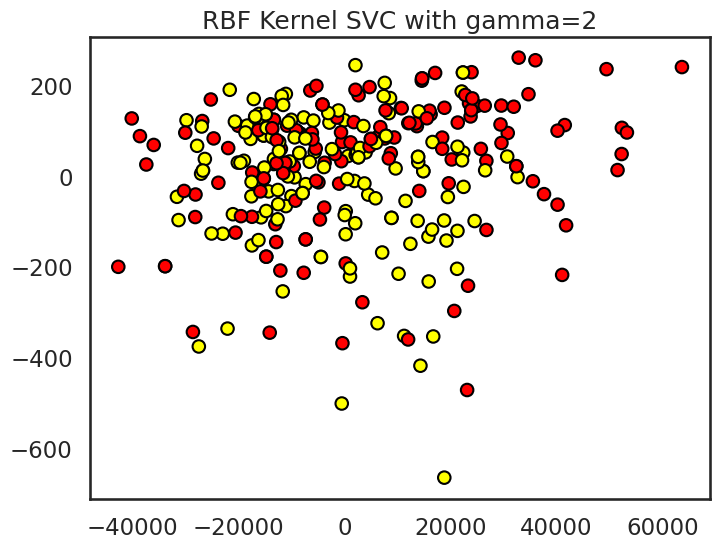

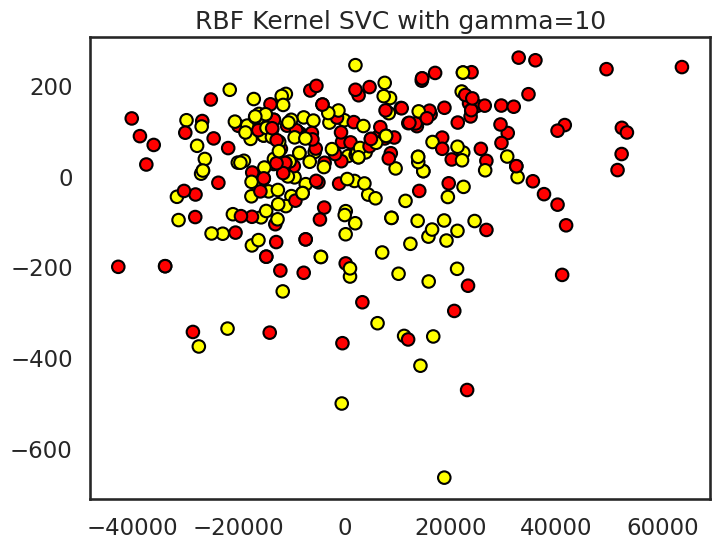

In [27]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]

for gamma in gammas:
    model = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma}')

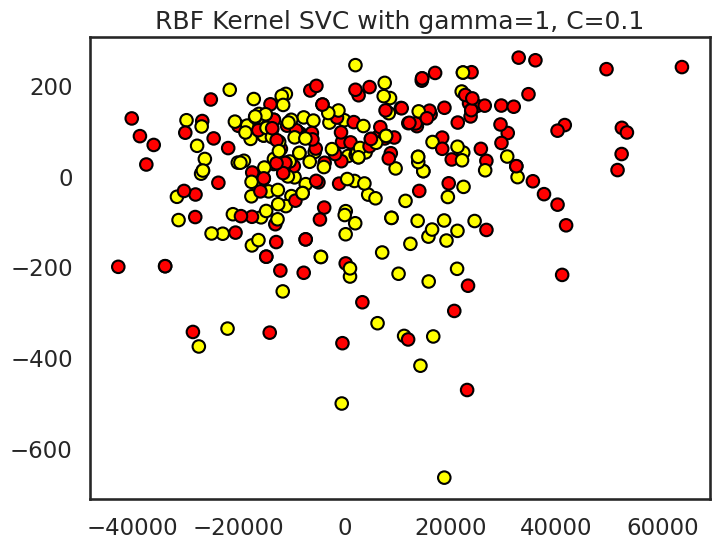

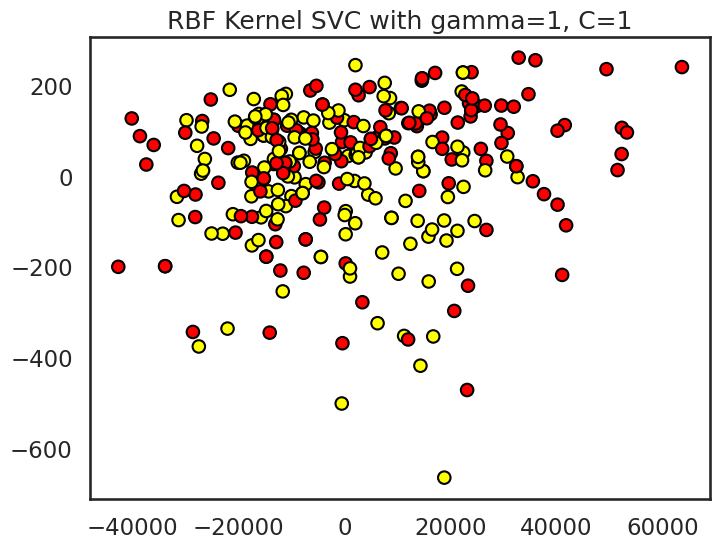

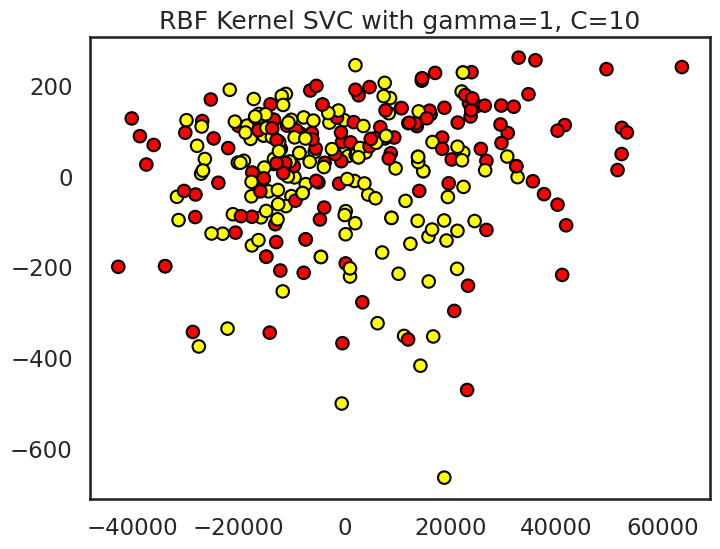

In [28]:
Cs = [0.1, 1, 10]
gamma_fixed = 1

for C in Cs:
    model = SVC(kernel='rbf', gamma=gamma_fixed, C=C)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma_fixed}, C={C}')


## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

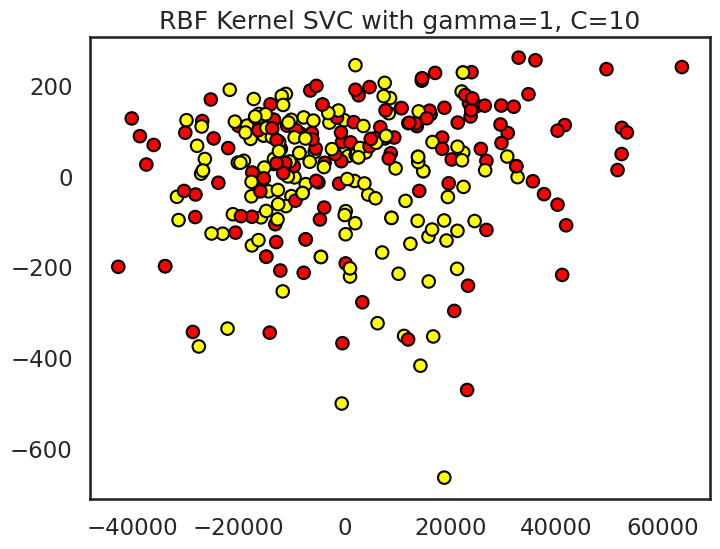

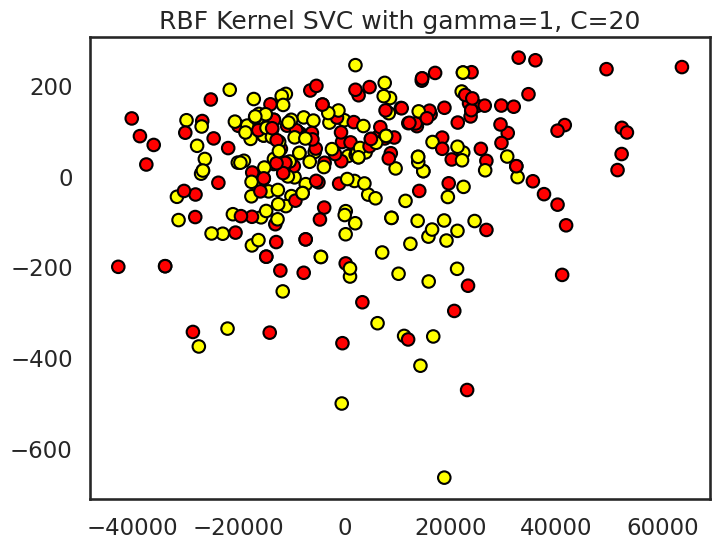

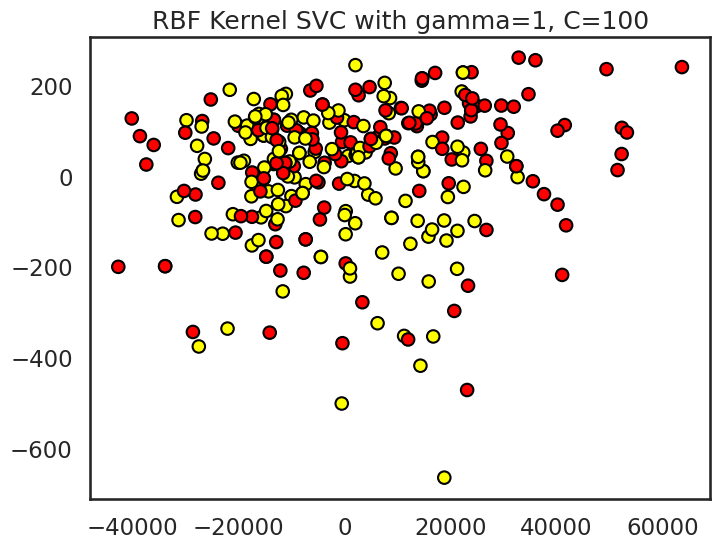

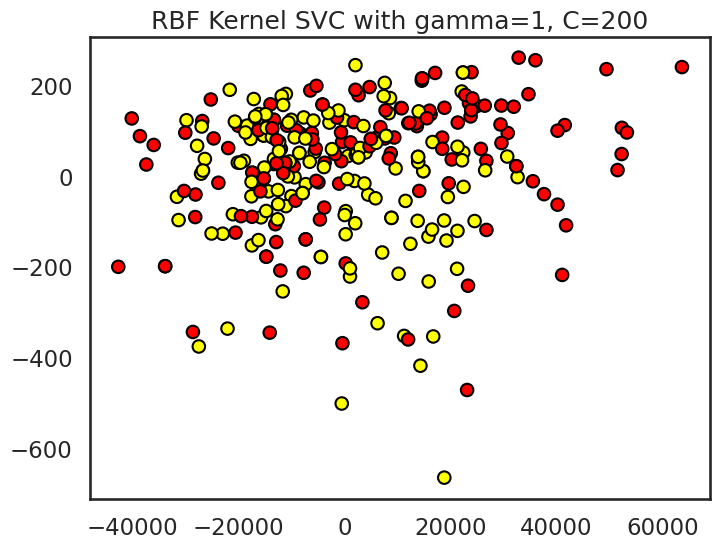

In [29]:
# Try with Polynomial kernel SVC
Cs = [10,20,100,200]
gamma_fixed = 1  # fixed gamma

for C in Cs:
    model = SVC(kernel='rbf', gamma=gamma_fixed, C=C)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma_fixed}, C={C}')


## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [14]:
# Reload data from original
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop(columns=['Class'])
y = df['Class']

In [15]:
import time
start_time = time.time()
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X, y)
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Execution time: 0.1797785758972168 seconds


In [16]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(12500, 12)
(12500,)


In [17]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Normalize the data to use scale gamma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set gamma to 1 / (n_features * X.var()) for 'scale' behavior
gamma_value = 1 / (X_scaled.shape[1] * X_scaled.var())

# Create the pipeline
nystroem_sgd = make_pipeline(Nystroem(kernel='rbf', gamma=gamma_value, n_components=100), SGDClassifier(max_iter=1000, tol=1e-3))

# Fit the model
import time
start_time = time.time()
nystroem_sgd.fit(X_scaled, y)
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


Execution time: 0.25534582138061523 seconds


In [18]:
import numpy as np

X_big = pd.concat([X]*5, ignore_index=True)
y_big = pd.concat([y]*5, ignore_index=True)


In [19]:
%%timeit
svc_big = SVC(kernel='rbf')
svc_big.fit(X_big, y_big)


2.56 s ± 479 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

print("All classes in dataset:\n", data['Class'].value_counts())

class_1 = 'Kırmızı'
class_2 = 'Çerçevelik'

filtered_data = data[data['Class'].isin([class_1, class_2])]

X = filtered_data.drop(columns=['Class'])
y = (filtered_data['Class'] == class_1).astype(int)

print("\nFinal label distribution (should show both 0 and 1):")
print(y.value_counts())

print(data['Class'].unique())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain set label distribution:")
print(pd.Series(y_train).value_counts())


All classes in dataset:
 Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

Final label distribution (should show both 0 and 1):
Class
0    1300
Name: count, dtype: int64
['Çerçevelik' 'Ürgüp Sivrisi']

Train set label distribution:
Class
0    1040
Name: count, dtype: int64


## Question 6
   Use the model from previous question to predict

 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')

X = df.drop(columns=['Class'])
y = df['Class']

print("Class distribution in y:", y.value_counts())

if len(np.unique(y)) < 2:
    raise ValueError("The dataset contains only one class. There should be at least two classes for classification.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {'C': [0.1, 1], 'gamma': ['scale'], 'kernel': ['linear']}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(SVC(), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class distribution in y: Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64
Confusion Matrix:
 [[227  33]
 [ 39 201]]
Accuracy Score: 0.856
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.85      0.87      0.86       260
Ürgüp Sivrisi       0.86      0.84      0.85       240

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

